<a href="https://colab.research.google.com/github/HS587885/Studying-MachineLearning/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn.init

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cuda'

In [ ]:
if device == 'cuda':
  torch.cuda.manual_seed_all(1)

batch_size = 256


In [ ]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
mnist_train = datasets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transform, # 텐서로 변환
                          download=True)

mnist_test = datasets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size)

In [ ]:
import matplotlib.pyplot as plt


def visualize_image(data,index,pred=False,val=0):
    plt.imshow(data[index].reshape(28,28))
    plt.axis('off')
    plt.show()

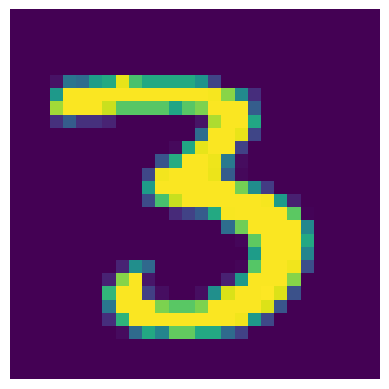

In [ ]:
visualize_image(mnist_train.data,12)


In [ ]:
import torch.nn.functional as F

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size = 5)
    self.conv2 = nn.Conv2d(32,32, kernel_size =5)
    self.conv3 = nn.Conv2d(32 , 64, kernel_size= 5)
    self.fc1 = nn.Linear(3*3*64, 256)
    self.fc2 = nn.Linear(256, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(F.max_pool2d(self.conv2(x), 2))
    x = F.dropout(x, p=0.5, training=self.training)
    x = F.relu(F.max_pool2d(self.conv3(x),2))
    x = F.dropout(x, p=0.5, training=self.training)
    x = x.view(-1,3*3*64 )
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)
    return F.log_softmax(x, dim=1)





In [ ]:
model = CNN().to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0015)

In [ ]:
EPOCHS = 5
model.train()
for epoch in range(EPOCHS):
    correct = 0
    for batch_idx, (X, y) in enumerate(train_loader):
        var_X_batch = X.to(device)
        var_y_batch = y.to(device)
        optimizer.zero_grad()
        output = model(var_X_batch)
        loss = criterion(output, var_y_batch)
        loss.backward()
        optimizer.step()

        # Total correct predictions
        predicted = torch.max(output.data, 1)[1]
        correct += (predicted == var_y_batch).sum()
        #print(correct)
        if batch_idx % 50 == 0:
            print('Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                epoch, batch_idx*len(X), len(train_loader.dataset), 100.*batch_idx / len(train_loader), loss.item(), float(correct*100) / float(256*(batch_idx+1))))


Epoch : 0 [0/60000 (0%)]	Loss: 2.300438	 Accuracy:9.375%
Epoch : 0 [12800/60000 (21%)]	Loss: 0.832439	 Accuracy:55.530%
Epoch : 0 [25600/60000 (43%)]	Loss: 0.380923	 Accuracy:68.313%
Epoch : 0 [38400/60000 (64%)]	Loss: 0.297770	 Accuracy:74.343%
Epoch : 0 [51200/60000 (85%)]	Loss: 0.232815	 Accuracy:78.125%
Epoch : 1 [0/60000 (0%)]	Loss: 0.189118	 Accuracy:92.969%
Epoch : 1 [12800/60000 (21%)]	Loss: 0.299873	 Accuracy:92.839%
Epoch : 1 [25600/60000 (43%)]	Loss: 0.143279	 Accuracy:92.744%
Epoch : 1 [38400/60000 (64%)]	Loss: 0.225802	 Accuracy:92.845%
Epoch : 1 [51200/60000 (85%)]	Loss: 0.167724	 Accuracy:93.023%
Epoch : 2 [0/60000 (0%)]	Loss: 0.184888	 Accuracy:94.531%
Epoch : 2 [12800/60000 (21%)]	Loss: 0.152885	 Accuracy:94.485%
Epoch : 2 [25600/60000 (43%)]	Loss: 0.172707	 Accuracy:94.558%
Epoch : 2 [38400/60000 (64%)]	Loss: 0.225602	 Accuracy:94.720%
Epoch : 2 [51200/60000 (85%)]	Loss: 0.128725	 Accuracy:94.788%
Epoch : 3 [0/60000 (0%)]	Loss: 0.146685	 Accuracy:94.531%
Epoch : 3 [12

In [ ]:
correct = 0
for test_imgs, test_labels in test_loader:
    #print(test_imgs.shape)
    test_imgs = test_imgs.to(device)
    test_labels = test_labels.to(device)
    output = model(test_imgs)
    predicted = torch.max(output,1)[1]
    correct += (predicted == test_labels).sum()
print("Test accuracy:{:.3f}% ".format( float(correct) / (len(test_loader)*256)))

NameError: name 'test_loader' is not defined

# Tensorflow

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import math
from glob import glob



from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.preprocessing import image


In [ ]:
!unzip /content/drive/MyDrive/data/cats_dogs.zip

(386, 500, 3)


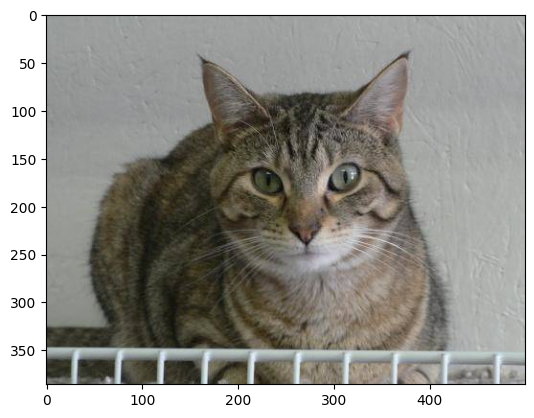

In [ ]:
bgd = image.load_img('/content/cats/cat.103.jpg')
bgd_vector = np.asarray(image.img_to_array(bgd))
bgd_vector = bgd_vector / 255

print(bgd_vector.shape)

plt.imshow(bgd_vector)
plt.show()

In [ ]:
image_channels = 3
img_rows = 64
img_cols = 64
classes = 2

In [ ]:
def build(input_shape, classes):
  model = models.Sequential()
  model.add(layers.Convolution2D(32, (3, 3), activation='relu',
                      input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(classes, activation='softmax'))
  return model

In [ ]:
images = [image.load_img(p, target_size=(img_rows, img_cols))
          for p in glob('/content/cats/*jpg') + glob('/content/dogs/*jpg')]
image_vector = np.asarray([image.img_to_array(img) for img in images])

In [ ]:
print(image_vector.shape)

(2000, 64, 64, 3)


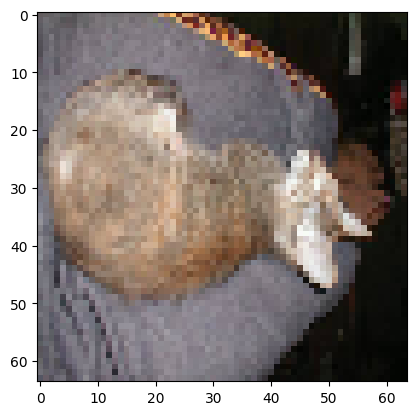

In [ ]:
plt.imshow(image_vector[0]/255)

In [ ]:
y=[1] * 1000 + [0] * 1000 # 개 고양이 라벨링

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_vector, y, test_size=0.20, random_state=0)

In [ ]:
X_train, X_test = X_train / 255, X_test / 255
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
model=build((img_rows, img_cols, image_channels), classes)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 32)                984096    
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 985058 (3.76 MB)
Trainable params: 985058 (3.76 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.1)

Epoch 1/50
23/23 [==============================] - 2s 37ms/step - loss: 0.1537 - accuracy: 0.9625 - val_loss: 1.1920 - val_accuracy: 0.5875
Epoch 2/50
23/23 [==============================] - 0s 10ms/step - loss: 0.1086 - accuracy: 0.9764 - val_loss: 1.0903 - val_accuracy: 0.6000
Epoch 3/50
23/23 [==============================] - 0s 8ms/step - loss: 0.0957 - accuracy: 0.9826 - val_loss: 1.2220 - val_accuracy: 0.5813
Epoch 4/50
23/23 [==============================] - 0s 8ms/step - loss: 0.0912 - accuracy: 0.9840 - val_loss: 1.0626 - val_accuracy: 0.6187
Epoch 5/50
23/23 [==============================] - 0s 8ms/step - loss: 0.0773 - accuracy: 0.9924 - val_loss: 1.2508 - val_accuracy: 0.5938
Epoch 6/50
23/23 [==============================] - 0s 8ms/step - loss: 0.0843 - accuracy: 0.9826 - val_loss: 1.0916 - val_accuracy: 0.6812
Epoch 7/50
23/23 [==============================] - 0s 8ms/step - loss: 0.0743 - accuracy: 0.9896 - val_loss: 1.1476 - val_accuracy: 0.6250
Epoch 8/50
23/23 [

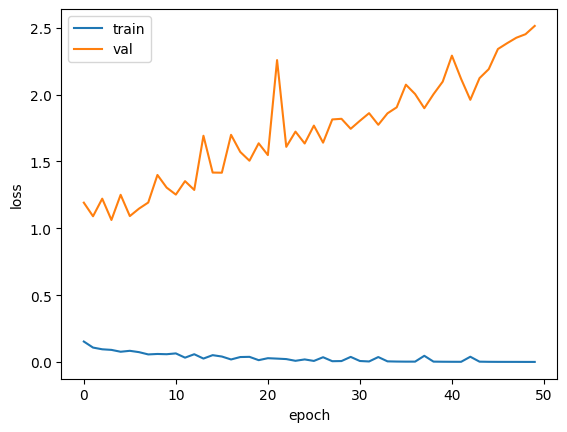

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

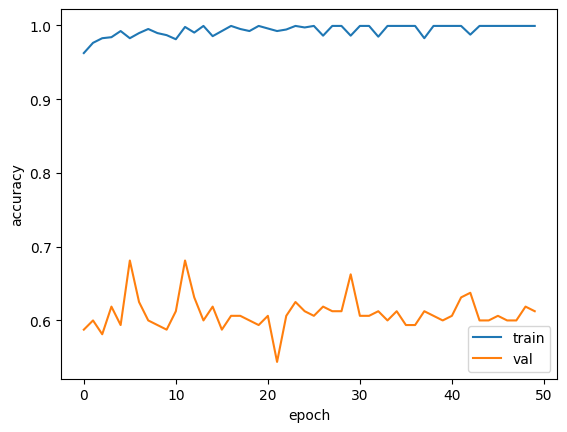

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test)
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

13/13 [==============================] - 0s 10ms/step - loss: 1.6096 - accuracy: 0.7000

Test loss: 1.6095672845840454
Test accuracy: 0.699999988079071


In [ ]:
# 초기코드 - python
from keras import utils
from keras.layers import Dense
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,ZeroPadding2D,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
#from PIL import Image
import os, glob, numpy as np
from keras.models import load_model
import random
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Activation, Dense
from tensorflow import keras
from tensorflow.keras.applications import EfficientNetB2

In [ ]:
# images = [image.load_img(p, target_size=(img_rows, img_cols)) for p in glob('/content/cats/*jpg') + glob('/content/dogs/*jpg')]
# image_vector = np.asarray([image.img_to_array(img) for img in images])

In [ ]:
train_data_dir = '/content/animals'
img_height=260
img_width=260
batch_size=32

train_datagen = ImageDataGenerator(
    #rescale=1./255,
    rotation_range=20,
    width_shift_range=0.4,
    height_shift_range=0.4,
    zoom_range=0.4,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=(0.9,1.1),
    validation_split=0.2) # set validation split

val_datagen = ImageDataGenerator(
    #rescale=1./255,
     validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    interpolation='lanczos',
    shuffle=True,
    subset='training') # set as training data

validation_generator = val_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    interpolation='lanczos',
    shuffle=False,
    subset='validation') # set as validation data

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
co=0
st=train_generator.class_indices.keys()
result_arr=list(st)
print(result_arr)

['cats', 'dogs']


In [ ]:
effi = EfficientNetB2(include_top=False, input_shape=(260,260,3))
model=Sequential()
model.add(effi)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 9, 9, 1408)        7768569   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1408)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 1408)              0         
                                                                 
 dense_3 (Dense)             (None, 2)                 2818      
                                                                 
Total params: 7771387 (29.65 MB)
Trainable params: 7703812 (29.39 MB)
Non-trainable params: 67575 (263.97 KB)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_dir = './model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path = model_dir + '/efficientnetB2_dropout12.model'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [ ]:
nb_epochs=50
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs,
    callbacks=[checkpoint,early_stopping]
    )

hist_df = pd.DataFrame(history.history)
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
!cp history.csv /content/gdrive/MyDrive/history.csv
!cp -r model /content/gdrive/MyDrive/model

Epoch 1/50
50/50 [==============================] - ETA: 0s - loss: 0.2542 - accuracy: 0.8888
Epoch 1: val_loss improved from inf to 0.31297, saving model to ./model/efficientnetB2_dropout12.model
50/50 [==============================] - 155s 2s/step - loss: 0.2542 - accuracy: 0.8888 - val_loss: 0.3130 - val_accuracy: 0.9401
Epoch 2/50
50/50 [==============================] - ETA: 0s - loss: 0.1650 - accuracy: 0.9344
Epoch 2: val_loss improved from 0.31297 to 0.17027, saving model to ./model/efficientnetB2_dropout12.model
50/50 [==============================] - 98s 2s/step - loss: 0.1650 - accuracy: 0.9344 - val_loss: 0.1703 - val_accuracy: 0.9661
Epoch 3/50
50/50 [==============================] - ETA: 0s - loss: 0.1661 - accuracy: 0.9287
Epoch 3: val_loss did not improve from 0.17027
50/50 [==============================] - 50s 995ms/step - loss: 0.1661 - accuracy: 0.9287 - val_loss: 0.1812 - val_accuracy: 0.9479
Epoch 4/50
50/50 [==============================] - ETA: 0s - loss: 0.

In [ ]:
# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(history.history)

# save to json:
hist_json_file = 'history.json'
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)


In [ ]:
!cp history.json ./gdrive/MyDrive/_history.json
!cp history.csv ./gdrive/MyDrive/_history.csv

cp: cannot create regular file './gdrive/MyDrive/_history.json': No such file or directory
cp: cannot create regular file './gdrive/MyDrive/_history.csv': No such file or directory


In [ ]:
test_data_dir = '/content/test'
test_datagen = ImageDataGenerator()
    #rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_height, img_width),
    batch_size=batch_size,
    class_mode=None, #결과 똑같이나온다 None이나 Categorical 이나
    color_mode='rgb',
    interpolation='lanczos',
    shuffle=False
    )

In [ ]:
co=0
st=train_generator.class_indices.keys()
result_arr=list(st)
print(result_arr)

In [ ]:
model = load_model('/content/model/efficientnetB2_dropout12.model')
prediction = model.predict(test_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
predicted_class = np.argmax(prediction,axis=1)

In [ ]:
test = pd.read_csv('/content/sample.csv')
df = test.reindex(index=test.index[:72000], columns=list(test.columns))
print(df)

In [ ]:
co=0
for i in predicted_class :
    ans = i
    ans=result_arr[ans]
    ans=int(ans)
    fname =test_generator.filenames[co]
    fname = fname.replace("unknown/","")
    find_row=test.loc[(test['filename']==fname)]
    find_row=int(find_row.index.tolist()[0])
    df.loc[find_row,'prediction']=ans
    co+=1
    print(co)

In [ ]:
df.to_csv("result.csv",mode='w',index=False)
!cp result.csv ./gdrive/MyDrive/result.csv